<a href="https://colab.research.google.com/github/lollolzz/Colab/blob/main/Ch3.%20%EB%94%A5%EB%9F%AC%EB%8B%9D/9_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/10/28
이름 : 권능한
내용 : 딥러닝 RNN 실습하기
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

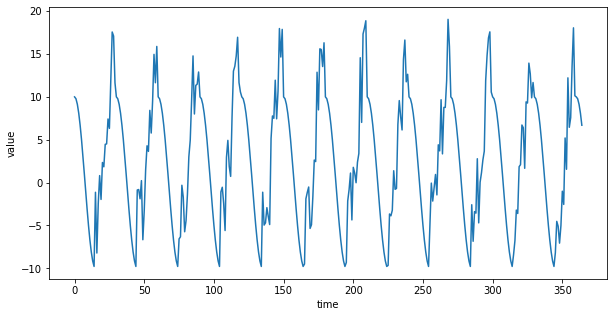

In [ ]:
# 시계열 데이터 생성
time = np.arange(365)
month_time = (time % 30) / 30
time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2*np.pi * month_time),
                            np.cos(2*np.pi * month_time) + np.random.random(365))
time_series

# 시각화
plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [ ]:

# 데이터 정규화
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)

train_data, train_label = make_sequence(time_series, 10)

In [ ]:
# 학습데이터, 라벨
_train_data = train_data[:300]
_train_label = train_label[:300]

_test_data = train_data[300:]
_test_label = train_label[300:]

In [ ]:
# 모델설계
model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# 모델설정
model.compile(optimizer='Adam', loss='mse', metrics=['acc'])

In [ ]:

# 학습하기
model.fit(_train_data, _train_label, epochs=1000)


Epoch 1/1000
10/10 [==============================] - 1s 9ms/step - loss: 56.0455 - acc: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 48.9386 - acc: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 43.4185 - acc: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 39.1067 - acc: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 35.6546 - acc: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 32.6103 - acc: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 29.9274 - acc: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 27.4422 - acc: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 4ms/step - loss: 25.4041 - acc: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 23.7479 - acc: 0.0000e+00

In [ ]:
# 성능평가
model.evaluate(_test_data, _test_label)

2/2 [==============================] - 0s 8ms/step - loss: 12.9258 - acc: 0.0000e+00


[12.925808906555176, 0.0]

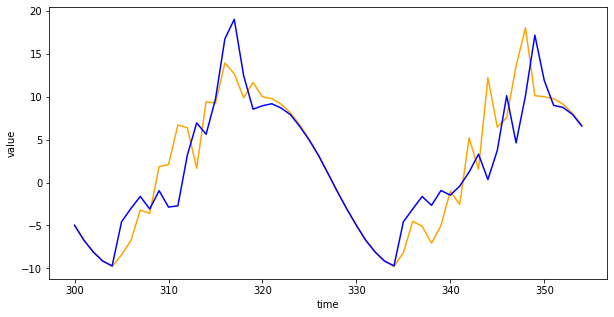

In [ ]:

# 그래프 출력
result = model.predict(_test_data)
result_range = np.arange(len(_train_label), len(_train_label)+len(result))
result_range

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='orange', label='label')
plt.plot(result_range, result, color='blue', label='result')
plt.show()